In [1]:
import pickle
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
import sys
sys.path.append("../")
sys.path.append("../imagen/")

from helpers import *
from imagen_pytorch import Unet, Imagen, ImagenTrainer, NullUnet

/vol/bitbucket/pn222/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
seed_value = 42
torch.manual_seed(seed_value)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed_value)

In [4]:
GENERALISED_RUN_NAME =  "64_FC_rot904_3e-4"
NIO_RUN_NAME = "64_FC_nio_rot904_3e-4"

def get_data(RUN_NAME):
    BASE_DIR = f"/vol/bitbucket/pn222/models/{RUN_NAME}"
    with open(BASE_DIR + f"/metrics_v2.pkl", "rb") as file:
        metric_dict = pickle.load(file)
    metrics = list(metric_dict["train"].keys())
    
    train_data = metric_dict["train"]
    test_data  = metric_dict["test"]
    oreg_test_data = metric_dict["oreg_test"]

    return {
        "train_data": train_data, 
        "test_data": test_data,
        "oreg_test_data": oreg_test_data
    }

In [5]:
nio_data = get_data(NIO_RUN_NAME)
generalised_data = get_data(GENERALISED_RUN_NAME)

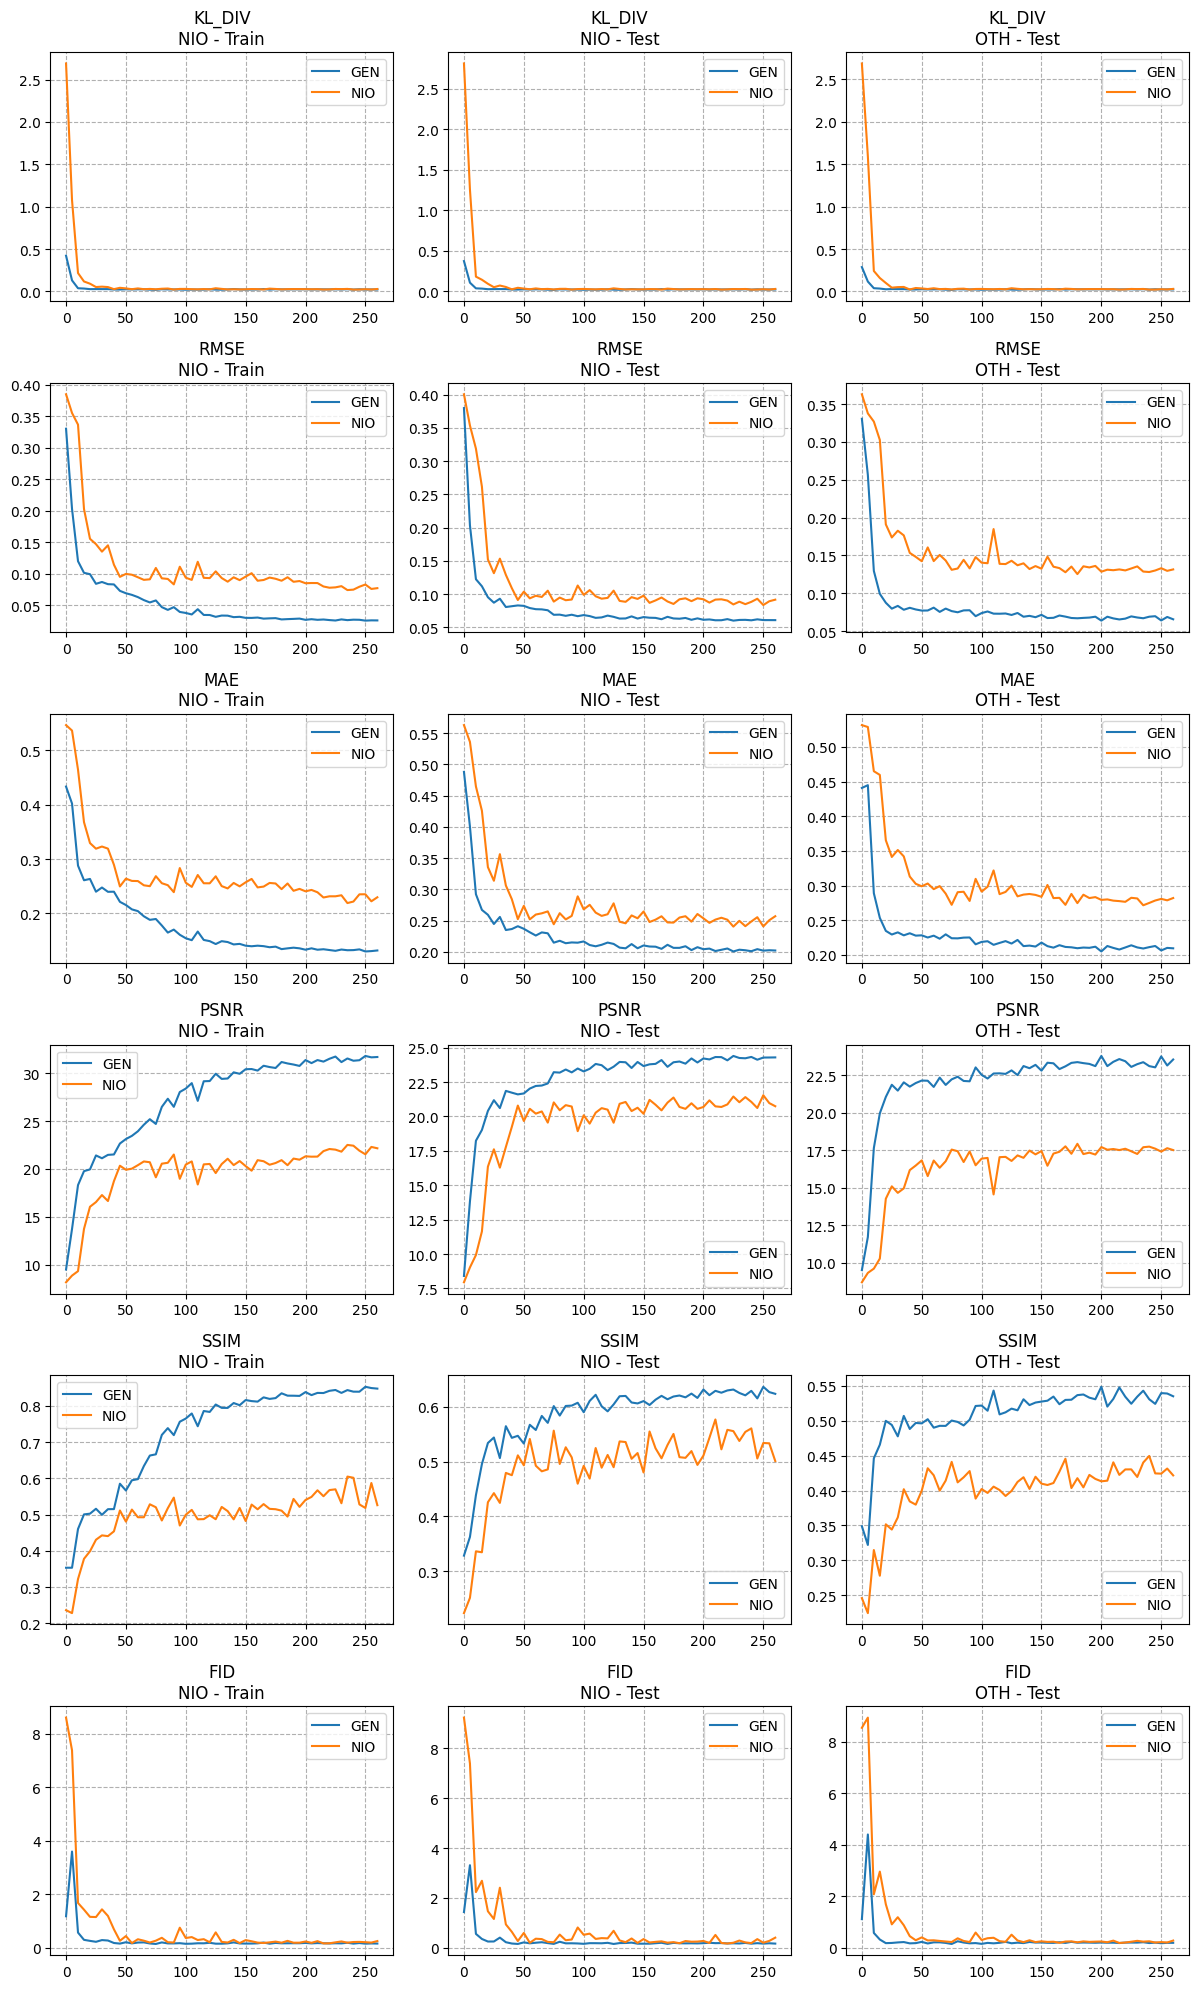

In [6]:
fig, axs = plt.subplots(6, 3, figsize=(12, 20))

x = [5*x for x in range(len(nio_data['train_data']['kl_div']))]
metrics = list(nio_data['train_data'].keys())

for i, metric in enumerate(metrics):
    row = i // 2 ; col = i % 2  
    
    for mode, data in [("GEN", generalised_data), ("NIO", nio_data)]:
        axs[i][0].plot(x, data["train_data"][metric], label=f'{mode}')
        axs[i][0].set_title(metric.upper() + f"\nNIO - Train") 
        
        axs[i][1].plot(x, data["test_data"][metric], label=f'{mode}')
        axs[i][1].set_title(metric.upper() + f"\nNIO - Test") 
        
        axs[i][2].plot(x, data["oreg_test_data"][metric], label=f'{mode}') 
        axs[i][2].set_title(metric.upper() + f"\nOTH - Test") 
        
    for ax in axs[i]:        
        ax.legend()
        ax.grid(True, linestyle='--')

plt.tight_layout()  
plt.savefig(f"../pngs/64_FC/metrics_64_FC_nio_vs_gen.png", bbox_inches="tight")
plt.show()